In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [5]:
def cv2_show(caption, im):
    cv2.imshow(caption,im)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [6]:
def plt_show(im,outfile):
    fig = plt.figure()
    plt.imshow(im, cmap='gray')
    plt.axis('off')
    plt.savefig(outfile)

In [7]:
def log_function(im):
    im = im.astype(np.float16)
    c = 255/(np.log(1 + np.max(im)))
    log_img = c * np.log(1 + im)
    return log_img.astype(np.uint8)



In [11]:
def log_manual(im):
    row, col = im.shape
    im = im.astype(np.float16)
    limg = np.zeros_like(im, dtype='float16')
    c = 255/(np.log(1 + np.max(im)))
    for i in range(row):
        for j in range(col):
            limg[i,j] = c*np.log(1 + im[i,j])
    return limg.astype(np.uint8)

In [9]:
img = cv2.imread('./images/dark2.png', 0)

In [12]:
img_log = log_function(img)
mul_imgs = cv2.hconcat([img, img_log])

In [13]:
img_log = log_manual(img)
mul_imgs = cv2.hconcat([img, img_log])

In [14]:
cv2_show("enhance image", mul_imgs)

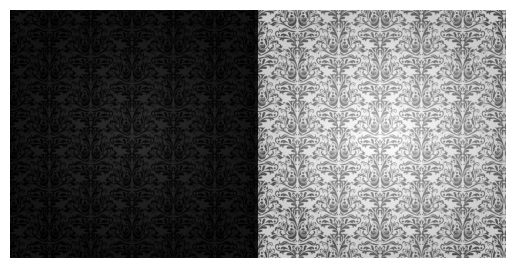

In [15]:
plt_show(mul_imgs, "./outs/enhance.png")